<h1>Hiperparâmetros</h1>

Parâmetros de configuração do modelo.

São configurações dadas para o modelo antes de seu treino qeu defininem a regra de criaçã do mesmo

In [64]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [65]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [66]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [67]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador
import numpy as np

SEED = 333

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()


,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,22
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,15
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,8


In [68]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)

'''
    Quando a árvore de decisões é treinada, com o número de camadas muito grande...
    O modelo acaba ficando muito bom para os dados de treino, porém horrível para os dados de teste. (OVERFITTING)
    Isso ocorre porque o modelo se 'vicia' com os dados de treino.
'''

modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.66
Intervalo [75.42, 81.90]


Precissao do modelo de: 0.79


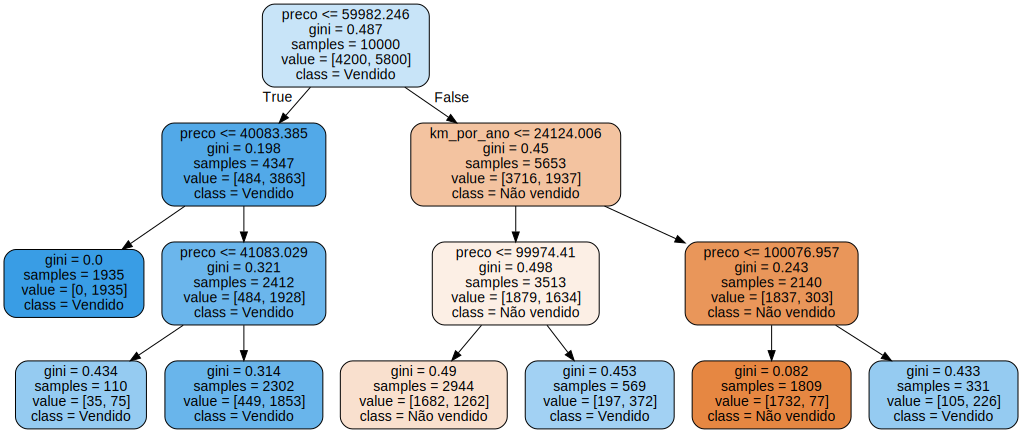

In [69]:
#visualização da árvore gerada
from sklearn.tree import export_graphviz
import graphviz

#Treinando o modelo com todos os dados da validação cruzada
modelo.fit(x_azar, y_azar)

print('Precissao do modelo de: %.2f' % modelo.score(x_azar, y_azar))

dot_data = export_graphviz(modelo, out_file=None, feature_names=x_azar.columns, class_names=["Não vendido", "Vendido"], rounded=True, filled=True)

graph = graphviz.Source(dot_data)
graph